<a href="https://colab.research.google.com/github/theaok/vis/blob/main/play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this is place to play with graphs and experiment

and also a placeholder to keep stuff than may incorprorate later

In [26]:
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np
from statistics import *

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now: 
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work                                                  

from google.colab import files

import webbrowser                                                                      
import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap                                      

#! pip install geocoder #]later maybe
#! pip install geopandas #this is how you install packages on colab
#import geopandas as gpd                                                                                       
#from geopy.geocoders import Nominatim #later maybe

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#!pip install mpld3 #LATER to zoom graphs and pop up info on hover
#import mpld3

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [27]:
!wget -q -O auto.dta https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download
auto=pd.read_stata('auto.dta'); auto.head(2)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic


# groupby and loop [basic example already in all:mpl setup/basic; MAYBE/LATER add there more from here]

In [234]:
g = auto.groupby(['foreign','rep78']) #subset data into n groups
g.ngroups

8

In [235]:
for i, (grp, d) in enumerate(g):
  print(i,grp)

0 ('D', 1.0)
1 ('D', 2.0)
2 ('D', 3.0)
3 ('D', 4.0)
4 ('D', 5.0)
5 ('F', 3.0)
6 ('F', 4.0)
7 ('F', 5.0)


In [66]:
#make it cleaner
auto.replace({'foreign' : { 'Domestic' : 'D', 'Foreign' : 'F' }},inplace=True)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([18. , 18.6, 19.2, 19.8, 20.4, 21. , 21.6, 22.2, 22.8, 23.4, 24. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, "('D', 1.0)")

(array([1., 0., 1., 1., 2., 0., 0., 0., 1., 2.]),
 array([14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, "('D', 2.0)")

(array([ 2.,  3.,  3.,  2., 10.,  4.,  0.,  1.,  0.,  2.]),
 array([12. , 13.7, 15.4, 17.1, 18.8, 20.5, 22.2, 23.9, 25.6, 27.3, 29. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, "('D', 3.0)")

(array([3., 1., 2., 0., 0., 2., 0., 0., 0., 1.]),
 array([14. , 15.4, 16.8, 18.2, 19.6, 21. , 22.4, 23.8, 25.2, 26.6, 28. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, "('D', 4.0)")

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([30. , 30.4, 30.8, 31.2, 31.6, 32. , 32.4, 32.8, 33.2, 33.6, 34. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, "('D', 5.0)")

(array([1., 0., 0., 0., 1., 0., 0., 0., 0., 1.]),
 array([21. , 21.5, 22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, "('F', 3.0)")

(array([1., 0., 2., 1., 3., 0., 0., 1., 0., 1.]),
 array([21. , 21.9, 22.8, 23.7, 24.6, 25.5, 26.4, 27.3, 28.2, 29.1, 30. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, "('F', 4.0)")

(array([4., 0., 0., 1., 0., 1., 0., 2., 0., 1.]),
 array([17. , 19.4, 21.8, 24.2, 26.6, 29. , 31.4, 33.8, 36.2, 38.6, 41. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, "('F', 5.0)")

''

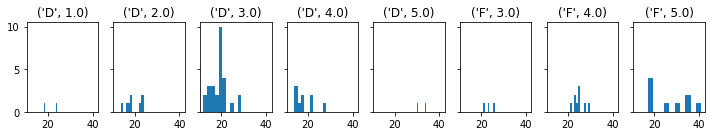

In [236]:
fig, axs = plt.subplots(1,g.ngroups, sharey=True,sharex=True, tight_layout=True, figsize=(10, 2))
for i, (grp, d) in enumerate(g):
  axs[i].hist(d['mpg'])
  axs[i].set_title(grp)
  #axs[i].set_xticklabels('')
;

In [72]:
g = auto.groupby(['rep78']) #subset data into n groups
g.ngroups

5

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([18. , 18.6, 19.2, 19.8, 20.4, 21. , 21.6, 22.2, 22.8, 23.4, 24. ]),
 <a list of 10 Patch objects>)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '1.0')

(array([1., 0., 1., 1., 2., 0., 0., 0., 1., 2.]),
 array([14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <a list of 10 Patch objects>)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '2.0')

(array([ 2.,  3.,  3.,  2., 10.,  4.,  0.,  1.,  0.,  2.]),
 array([12. , 13.7, 15.4, 17.1, 18.8, 20.5, 22.2, 23.9, 25.6, 27.3, 29. ]),
 <a list of 10 Patch objects>)

(array([1., 0., 0., 0., 1., 0., 0., 0., 0., 1.]),
 array([21. , 21.5, 22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '3.0')

(array([3., 1., 2., 0., 0., 2., 0., 0., 0., 1.]),
 array([14. , 15.4, 16.8, 18.2, 19.6, 21. , 22.4, 23.8, 25.2, 26.6, 28. ]),
 <a list of 10 Patch objects>)

(array([1., 0., 2., 1., 3., 0., 0., 1., 0., 1.]),
 array([21. , 21.9, 22.8, 23.7, 24.6, 25.5, 26.4, 27.3, 28.2, 29.1, 30. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '4.0')

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([30. , 30.4, 30.8, 31.2, 31.6, 32. , 32.4, 32.8, 33.2, 33.6, 34. ]),
 <a list of 10 Patch objects>)

(array([4., 0., 0., 1., 0., 1., 0., 2., 0., 1.]),
 array([17. , 19.4, 21.8, 24.2, 26.6, 29. , 31.4, 33.8, 36.2, 38.6, 41. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '5.0')

''

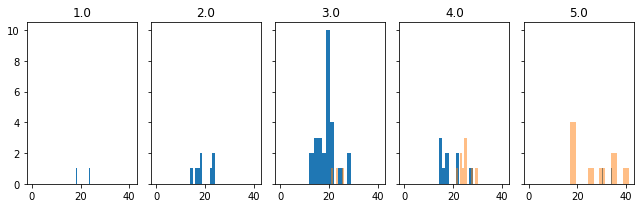

In [139]:
fig, axs = plt.subplots(1,g.ngroups, sharex=True,sharey=True, tight_layout=True, figsize=(9, 3))
for i, (grp, d) in enumerate(g):
  axs[i].hist(d.mpg[d.foreign=="D"])  
  axs[i].hist(d.mpg[d.foreign=="F"],alpha=.5)
  axs[i].set_title(grp)
  #axs[i].set_xticklabels('')
;

foreign,D,F
rep78,,
1.0,2,0
2.0,8,0
3.0,27,3
4.0,9,9
5.0,2,9


foreign
D    AxesSubplot(0.125,0.125;0.133621x0.755)
Name: mpg, dtype: object

Text(0.5, 1.0, '1.0')

foreign
D    AxesSubplot(0.285345,0.125;0.133621x0.755)
Name: mpg, dtype: object

Text(0.5, 1.0, '2.0')

foreign
D    AxesSubplot(0.44569,0.125;0.133621x0.755)
F    AxesSubplot(0.44569,0.125;0.133621x0.755)
Name: mpg, dtype: object

Text(0.5, 1.0, '3.0')

foreign
D    AxesSubplot(0.606034,0.125;0.133621x0.755)
F    AxesSubplot(0.606034,0.125;0.133621x0.755)
Name: mpg, dtype: object

Text(0.5, 1.0, '4.0')

foreign
D    AxesSubplot(0.766379,0.125;0.133621x0.755)
F    AxesSubplot(0.766379,0.125;0.133621x0.755)
Name: mpg, dtype: object

Text(0.5, 1.0, '5.0')

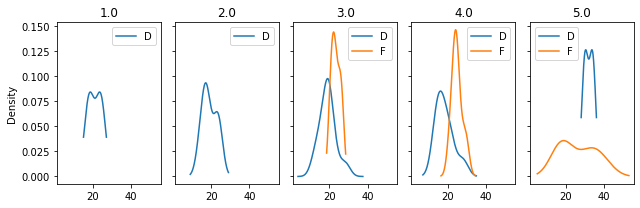

In [153]:
#note hist easier understood with counts; density has density units on y axis
#and density is not relative density across groups, but within each group
#that density for F is higher than for D, as in cat 3, doesnt mean there are more F cars:
pd.crosstab(auto["rep78"], auto["foreign"])  
fig, axs = plt.subplots(1,g.ngroups,sharex=True, sharey=True, tight_layout=True, figsize=(9, 3))
for i, (grp, d) in enumerate(g):
  d.groupby(d.foreign)['mpg'].plot(kind='density', legend=True,bw_method=0.6,ax=axs[i]) #pandas
### separately below
  #d.mpg[d.foreign=="D"].plot.kde(ax=axs[i]);  
  #d.mpg[d.foreign=="D"].plot(kind = 'density',bw_method=0.4,ax=axs[i]) #pandas
  #try:
  #  d.mpg[d.foreign=="F"].plot(kind = 'density',bw_method=0.4, ax=axs[i]) #pandas #BUG brekas bc obs doesnt exist
  #except Exception: 
  #  pass
  #axs[i].hist(d.mpg[d.foreign=="D"])  
  #axs[i].hist(d.mpg[d.foreign=="F"],alpha=.5)
  axs[i].set_title(grp)
  #axs[i].set_xticklabels('')
#plt.legend(["D","F"],loc='upper left',borderpad=.1, labelspacing=.1);

# density without looping

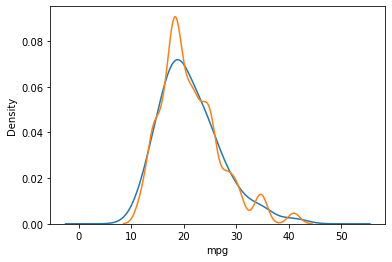

In [101]:
#auto.mpg.hist();
#auto.mpg.plot(kind = 'hist')
auto.mpg.plot(kind = 'density') #pandas
sns.kdeplot(auto.mpg, bw_method = .2) #sns Lower values lead to a more “wiggly” plot

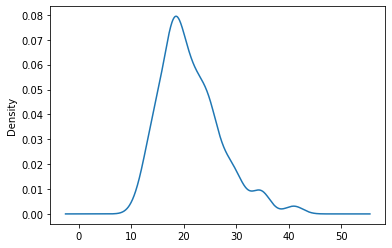

In [140]:
auto.mpg.plot.kde(bw_method=0.3); #A scalar bandwidth can be specified. Using a small bandwidth value can lead to over-fitting, while using a large bandwidth value may result in under-fitting

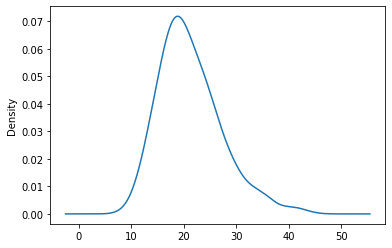

In [240]:
auto.mpg.plot.kde(by='foreign');

foreign
D    AxesSubplot(0.125,0.125;0.775x0.755)
F    AxesSubplot(0.125,0.125;0.775x0.755)
Name: mpg, dtype: object

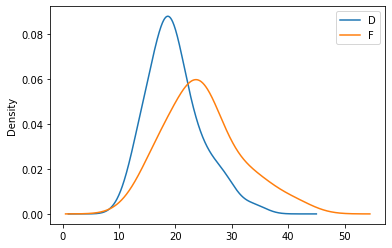

In [150]:
auto.groupby(auto.foreign)['mpg'].plot(kind='density', legend=True)

# ggplot like matrix 2x2 etc of graphs
may do sth like these and incorporate at some point

In [237]:
#seaborn is fast and easy for complex subsetting; first gen a dummy:
auto['longHeavy'] = (auto.weight >= auto.weight.mean()) & (auto.length >= auto.length.mean())
#auto #make sure dummy makes sense, sort on different vars, and/or sum stats:
pd.pivot_table(auto, index=['longHeavy','foreign'], values= ['weight','length'] ,
               aggfunc=['mean','min','max']).round(1)

mean            min           max       
                  length  weight length weight length weight
longHeavy foreign                                           
False     D        172.1  2540.6    147   1800    195   3350
          F        166.2  2218.0    142   1760    189   2830
True      D        207.8  3694.3    193   3180    233   4840
          F        192.5  3295.0    192   3170    193   3420

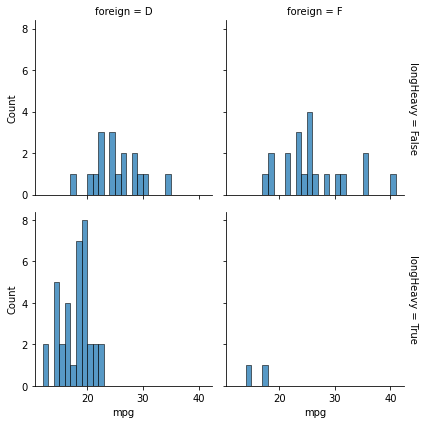

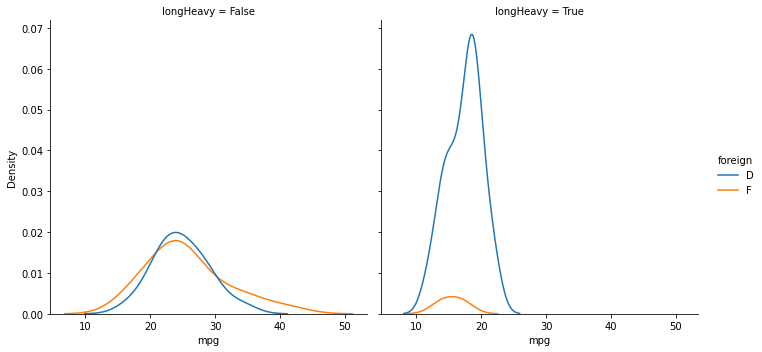

In [238]:
sns.displot(auto, x="mpg", col="foreign", row="longHeavy", #note distplot is fig-level so cant do axs
    binwidth=1, height=3, facet_kws=dict(margin_titles=True)) #rather for quick and dirty explration than final meaningful polished
sns.displot(data=auto, x="mpg", hue="foreign", col="longHeavy",kind="kde"); #height=4, aspect=.7,
#g.set_axis_labels("Density", "mpg");

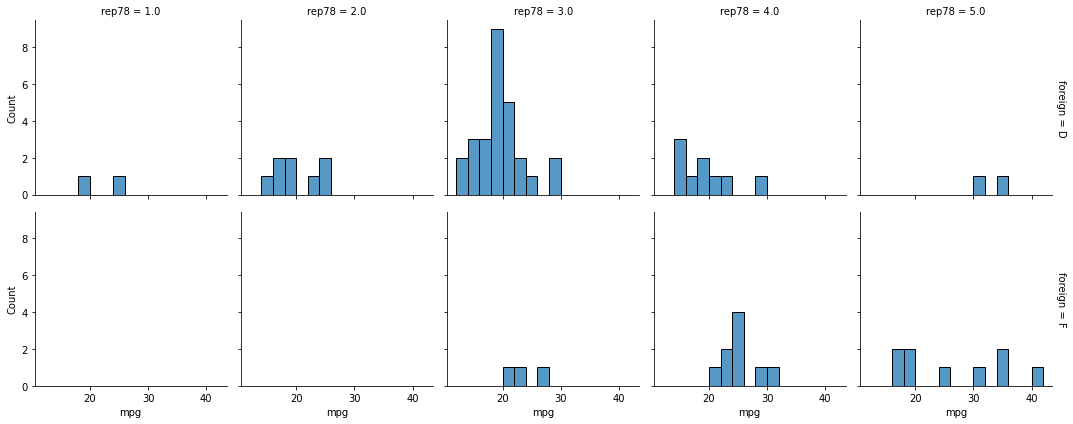

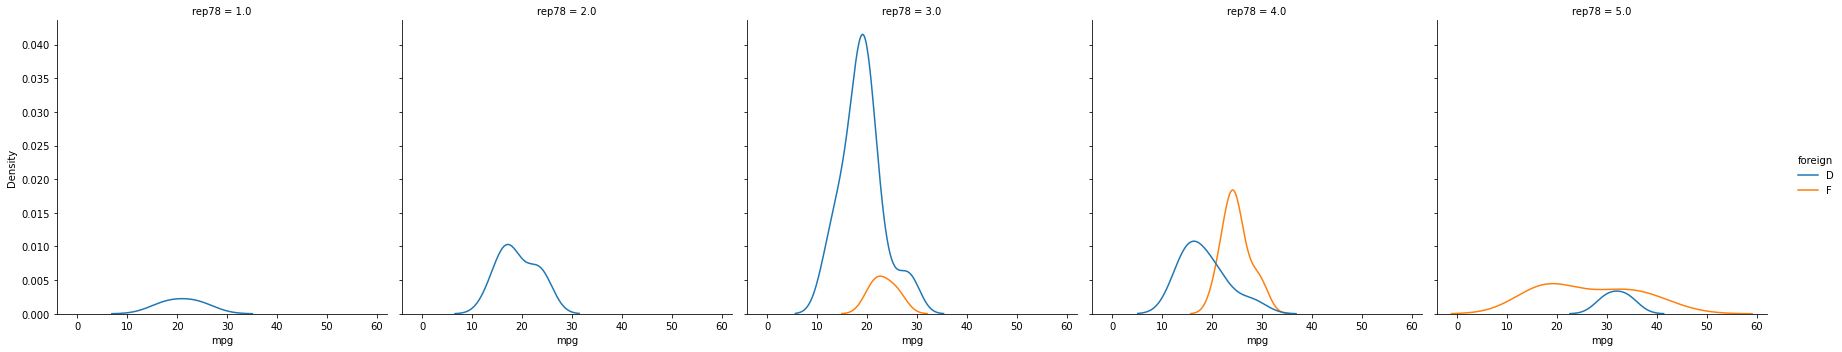

In [239]:
sns.displot(auto, x="mpg", col="rep78", row="foreign",
    binwidth=2, height=3, facet_kws=dict(margin_titles=True),)
sns.displot(data=auto, x="mpg", hue="foreign", col="rep78",kind="kde");    #height=4, aspect=.7,
#g.set_axis_labels("Density", "mpg");
#g.set_titles("{col_name} rep78");